# First, let's create two Gaussians with following parametrs: 

# Positive examples: mu=2 sigma=1 (BLUE)
# Negative examples: mu=-2 sigma=1.5 (RED)

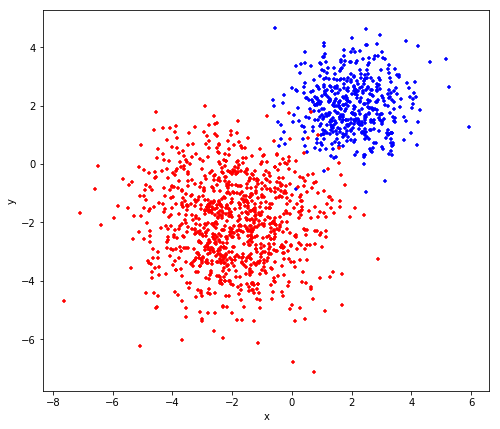

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(12345)

n_components = 2
X = np.array([])



X_pos_x = np.random.normal(2, 1, 500)
X_pos_y = np.random.normal(2, 1, 500)
X_pos = np.array(list(zip(X_pos_x,X_pos_y)))
Y_pos = np.ones((X_pos.shape[0]))
X_neg_x = np.random.normal(-2, 1.5, 1000)
X_neg_y = np.random.normal(-2, 1.5, 1000)
X_neg = np.array(list(zip(X_neg_x,X_neg_y)))
Y_neg = np.zeros((X_neg.shape[0]))

plt.figure(1, figsize=(8, 7))

plt.scatter(X_pos[:,0], X_pos[:,1],marker='+', s=20,c=['b'])
plt.scatter(X_neg[:,0], X_neg[:,1], marker='+',s=20,c=['r'])

plt.xlabel("x")
plt.ylabel("y");
X = np.append(X_pos,X_neg,axis=0)
Y = np.append(Y_pos,Y_neg)
plt.show()

# Then we buid LogisticRegression model, using sklearn.

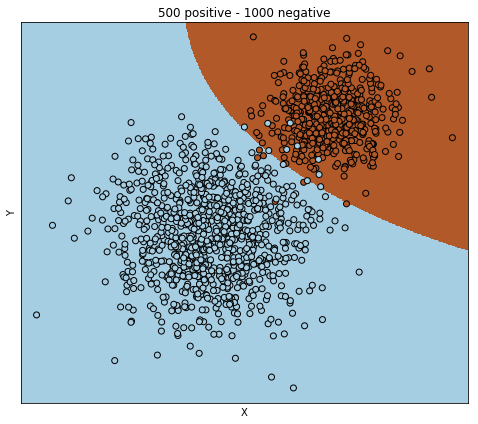

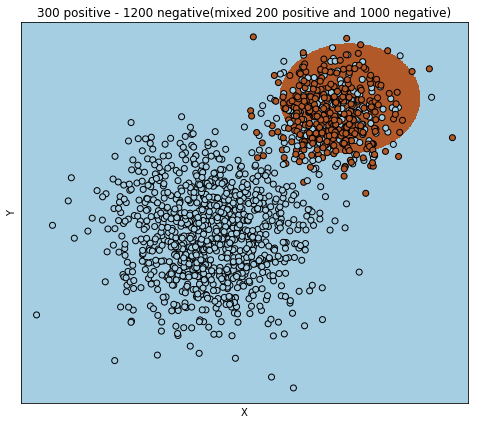

In [2]:

from sklearn.linear_model import LogisticRegression
from sklearn import datasets


X = np.append(X_pos,X_neg,axis=0)
Y = np.append(Y_pos,Y_neg)
X = np.append(X,np.power(X,2), axis=1)



#First training session

logreg = LogisticRegression(C=1e30, solver='lbfgs', multi_class='multinomial')


logreg.fit(X, Y)


x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print()
Z = logreg.predict(np.append(np.c_[xx.ravel(), yy.ravel()], np.power(np.c_[xx.ravel(), yy.ravel()],2),axis=1))


Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 7))
plt.title('500 positive - 1000 negative')
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

"""
Changing 500-1000 dataset to 300-1200
(40 percent decrease of positive samples)
"""

X_sam = np.ndarray((0,4))

perc = X_pos.shape[0]*(1-0.6)

k=0
for i in range(len(Y)):
    if k<perc:
        if Y[i]==1.0:

            k+=1
            Y[i] = 0.0

    
    if k>=perc:
        if Y[i]==1.0:
            X_sam = np.vstack([X_sam,X[i]])
#Second training session
logreg.fit(X, Y)


x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print()
Z = logreg.predict(np.append(np.c_[xx.ravel(), yy.ravel()], np.power(np.c_[xx.ravel(), yy.ravel()],2),axis=1))


Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 7))
plt.title('300 positive - 1200 negative(mixed 200 positive and 1000 negative)')
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

# As we can see the second training session has decent results, despite having less labeled data.

# Finally, calculating the first estimator(e1) from Sector 2 

In [3]:
(logreg.predict_proba(X_sam)[:,1].sum())/(logreg.predict_proba(X)[:,1].sum())

0.5791013661559615

# Positive-labeled examples are approximately 58% of all positive examples, which is close to the truth (60%)